# US Airline Routes and Fare Data Analysis

## Overview

This project analyzes a 30 year dataset of US airlines routes and fares focusing on identifying trends in flight fares, routes, passengers, and key routes. The goal is to uncover actionable insights that can improve airline efficiency.

## Dataset Description

Here is an explanation of each column in the dataset.
1. __tbl__ : Indicates the table name or source reference.
2. __year__ : Year when the flight data is recorded.
3. __quarter__ : The quarter of the year.
4. __citymarketid_1__ : Its a unique identifier for the origin city.
5. __citymarketid_2__ : Unique identifier for the destination city.
6. __city1__ : Name of the origin city.
7. __city2__ : Name of the destination city.
8. __airportid_1__ : A unique identifier for the origin airport.
9. __airportid_2__ : A unique identifier for the destination airport.
10. __airport1__ : The IATA airport code for the origin airport.
11. __airport2__ : The IATA airport code for the destination airport.
12. __nsmiles__ : The distance in miles between the origin and destination airports.
13. __passengers__ : The number of passengers on that flight.
14. __fare__ : The average fare paid by passengers on this route.
15. __carrier_lg__ : Carrier code of the airline that has the largest market share on this route.
16. __large_ms__ : The market share percentage of the largest carrier on this route.
17. __fare_lg__ : The average fare charged by the largest carrier on this route.
18. __carrier_low__ : The airline carrier code for the low cost carrier on this route.
19. __lf_ms__ : The market share percentage of the low cost carrier on this route.
20. __fare_low__ : The average fare of the low cost carrier on this route.
21. __Geocoded_City1__ : Geographic coordinates for the origin city.
22. __Geocoded_City2__ : Geographic coordinates for the destination city.
23. __tbl1apk__ : A unique identifier for each record in this dataset.


## Importing necessary libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
pd.set_option('display.max_columns', None)

## Load the dataset

In [49]:
data = pd.read_csv('US Flight Routes Fare Data.csv')


## Data Exploration and Cleaning

In [51]:
data.head()

,tbl,year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
1,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
2,Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,10721,ABQ,BOS,1974,153,324.97,AA,0.4263,323.73,WN,0.1609,298.20,NaN,NaN,202131014010721ABQBOS
3,Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,151,291.16,AA,0.4404,296.88,WN,0.3197,247.20,NaN,NaN,202131014011278ABQDCA
4,Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,12264,ABQ,IAD,1670,59,343.58,UA,0.5646,382.06,WN,0.1402,266.61,NaN,NaN,202131014012264ABQIAD


In [53]:
data.shape

(128811, 23)

### Removing unnecessary columns

In [55]:
# There is no need of some columns for the analysis therefore I am removing them from the data.
data.drop(['tbl', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 
                     'Geocoded_City1', 'Geocoded_City2', 'tbl1apk'], axis=1, inplace=True)
data.columns

Index(['year', 'quarter', 'city1', 'city2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low'],
      dtype='object')

### Checking duplicate rows

In [57]:
data.duplicated().sum()

0

### Handling null values

In [59]:
data.isnull().sum()

year              0
quarter           0
city1             0
city2             0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1540
large_ms       1540
fare_lg        1540
carrier_low    1612
lf_ms          1612
fare_low       1612
dtype: int64

In [61]:
data.loc[data['carrier_lg'].isnull()].head(3)

,year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
1184,2021,4,"Boston, MA (Metropolitan Area)","New York City, NY (Metropolitan Area)",PVD,JFK,209,0,64.5,NaN,NaN,NaN,NaN,NaN,NaN
2761,1997,1,"Houston, TX","Lubbock, TX",EFD,LBB,482,0,63.0,NaN,NaN,NaN,NaN,NaN,NaN
2770,2002,3,"New York City, NY (Metropolitan Area)","Reno, NV",NYC,RNO,2443,0,211.5,NaN,NaN,NaN,NaN,NaN,NaN


We can see from the above that where 'carrier_lg' is null, another columns that have null values are also null.
So we will find how many total common rows are there in the data where these columns have null values.

In [63]:
data.loc[data['carrier_lg'].isnull() | data['large_ms'].isnull() | data['fare_lg'].isnull() |
         data['carrier_low'].isnull() | data['lf_ms'].isnull() | data['fare_low'].isnull()].shape

(1612, 15)

So we can see that there are total 1612 rows which have null values ​​in any of the columns and our data has 128811 rows. Therefore there is no problem in removing these rows.

In [65]:
data.dropna(inplace = True)
data.shape

(127199, 15)

### Checking data type of columns

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127199 entries, 0 to 128810
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         127199 non-null  int64  
 1   quarter      127199 non-null  int64  
 2   city1        127199 non-null  object 
 3   city2        127199 non-null  object 
 4   airport_1    127199 non-null  object 
 5   airport_2    127199 non-null  object 
 6   nsmiles      127199 non-null  int64  
 7   passengers   127199 non-null  int64  
 8   fare         127199 non-null  float64
 9   carrier_lg   127199 non-null  object 
 10  large_ms     127199 non-null  float64
 11  fare_lg      127199 non-null  float64
 12  carrier_low  127199 non-null  object 
 13  lf_ms        127199 non-null  float64
 14  fare_low     127199 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 15.5+ MB


In [168]:
# All columns are in right type of data types so there is no need to change any column's datatype.

### Identifying unique values to detect inconsistencies

In [69]:
# Let's check unique values of non-numeric columns to find any inconsistencies in values.

non_numeric = data.select_dtypes(exclude='number')
for col in non_numeric.columns:
    print(non_numeric[col].unique())
    print("\n")

['Allentown/Bethlehem/Easton, PA' 'Albuquerque, NM' 'Nantucket, MA'
 'Colorado Springs, CO' 'Dallas/Fort Worth, TX' 'Pittsburgh, PA'
 'Huntsville, AL' 'Albany, NY' 'Denver, CO'
 'Atlanta, GA (Metropolitan Area)' 'Austin, TX' 'Tucson, AZ' 'Phoenix, AZ'
 'Hartford, CT' 'Seattle, WA' 'Birmingham, AL' 'El Paso, TX'
 'Cleveland, OH (Metropolitan Area)' 'Nashville, TN' 'Boise, ID'
 'Boston, MA (Metropolitan Area)' 'Buffalo, NY' 'Bozeman, MT'
 'Chicago, IL' 'Charleston, SC' 'Cedar Rapids/Iowa City, IA'
 'Charlotte, NC' 'Columbus, OH' 'St. Louis, MO' 'Myrtle Beach, SC'
 'Jacksonville, FL' 'Detroit, MI' 'Des Moines, IA' 'Houston, TX'
 'Orlando, FL' 'Valparaiso, FL' 'Eugene, OR' 'Key West, FL' 'Fargo, ND'
 'Kalispell, MT' 'Minneapolis/St. Paul, MN'
 'New York City, NY (Metropolitan Area)' 'Fort Myers, FL'
 'Greenville/Spartanburg, SC' 'Grand Rapids, MI'
 'Greensboro/High Point, NC' 'Las Vegas, NV' 'Indianapolis, IN'
 'Jackson, WY' 'Jackson/Vicksburg, MS'
 'San Francisco, CA (Metropolitan Area)' 

There are no inconsistencies and no special characters in these columns.

### Removing extra spaces in values

In [71]:
data[non_numeric.columns] = non_numeric.apply(lambda x: x.str.strip())

### Outlier detection and value distribution across columns

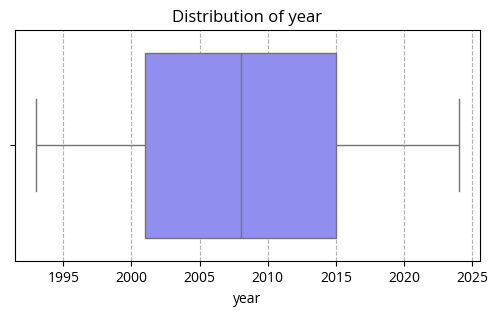

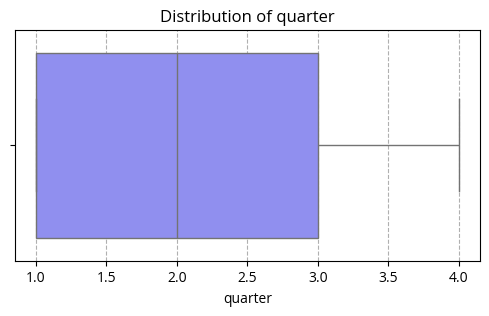

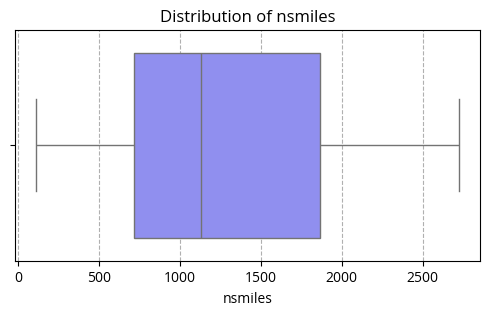

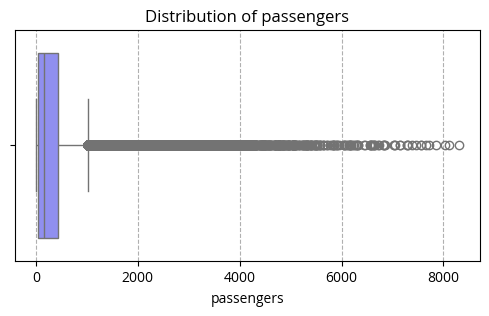

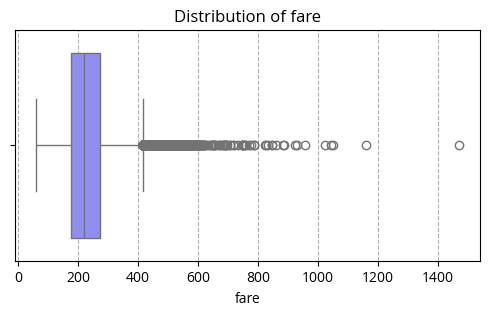

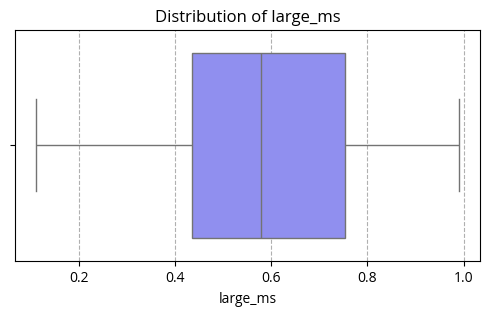

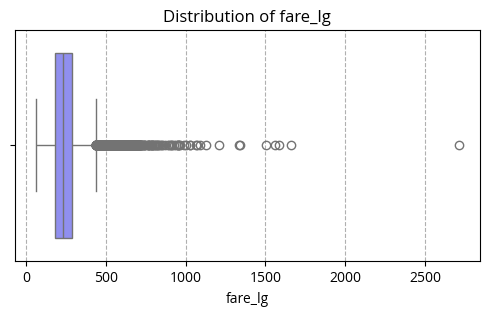

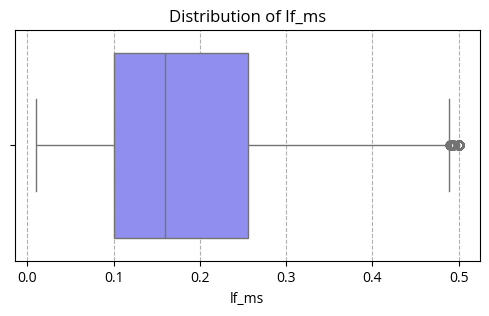

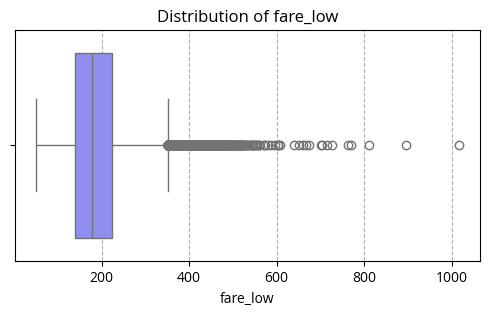

In [73]:
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col], palette='cool')
    plt.grid(True, which='both', axis='x', linestyle='--')
    plt.title(f'Distribution of {col}')
    plt.show()

From the above box plots we can observe that all values appear to fall within the typical distribution. But in the boxplot of passengers we can see that there are some outliers i.e values around 0. So I have to remove them to ensure the accuracy of analysis.

In [41]:
# Let's check how many rows are there that have 0 passengers.

data.loc[data['passengers']==0].shape

(368, 15)

In [43]:
# Removing the rows that have 0 passengers in the dataset.

data = data.loc[data['passengers']>0]

### Renaming columns for clarity

In [79]:
#Let's rename some columns for better understanding and clarity of dataset.

data.rename(columns = {'city1':'origin_city', 'city2':'destination_city', 'airport_1':'origin_airport', 'airport_2':'destination_airport',
                       'nsmiles':'distance', 'fare':'average_fare', 'carrier_lg':'largest_carrier_code', 'large_ms':'largest_carrier_market_share',
                       'fare_lg':'largest_carrier_average_fare', 'carrier_low':'lowest_fare_carrier_code', 'lf_ms':'lowest_carrier_market_share',
                       'fare_low':'lowest_carrier_average_fare'}, inplace=True)

In [47]:
#Let's assign months to corresponding quarters in the 'quarter' column.

def assign_months(quarter):
    if quarter == 1:
        return 'Jan-March'
    elif quarter == 2:
        return 'April-June'
    elif quarter == 3:
        return 'July-Sept'
    elif quarter == 4:
        return 'Oct-Dec'

data['quarter'] = data['quarter'].apply(assign_months)

# Data Analysis

## Correlation Analysis
Lets see how different columns relate with each other using correlation matrix and heatmap.

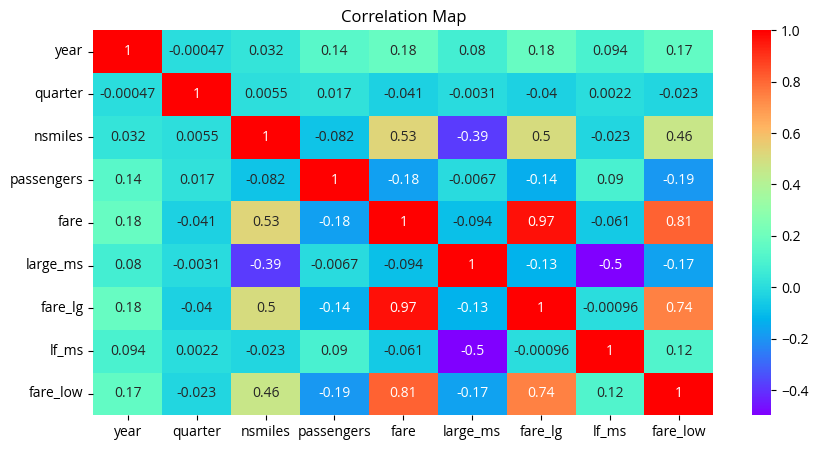

In [75]:
correlation_matrix = data.select_dtypes(include='number').corr()

# Changing font style for plots
plt.rcParams['font.family'] = 'Open Sans'

#Plotting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Map')
plt.show()

The heatmap indicates that there is no strong correlation among most variables, except for 'average_fare', 'lowest_carrier_average_fare', and 'largest_carrier_average_fare', which show a notable correlation. This is expected, given their related nature.

## Trend Analysis of Average Fare over the Years

In [81]:
fare_by_year = data.groupby('year')['average_fare'].mean().reset_index()

In [83]:
# Let's create a column for percentage increase in average fare from the previous year

fare_by_year['percentage_increase'] = fare_by_year['average_fare'].pct_change() * 100

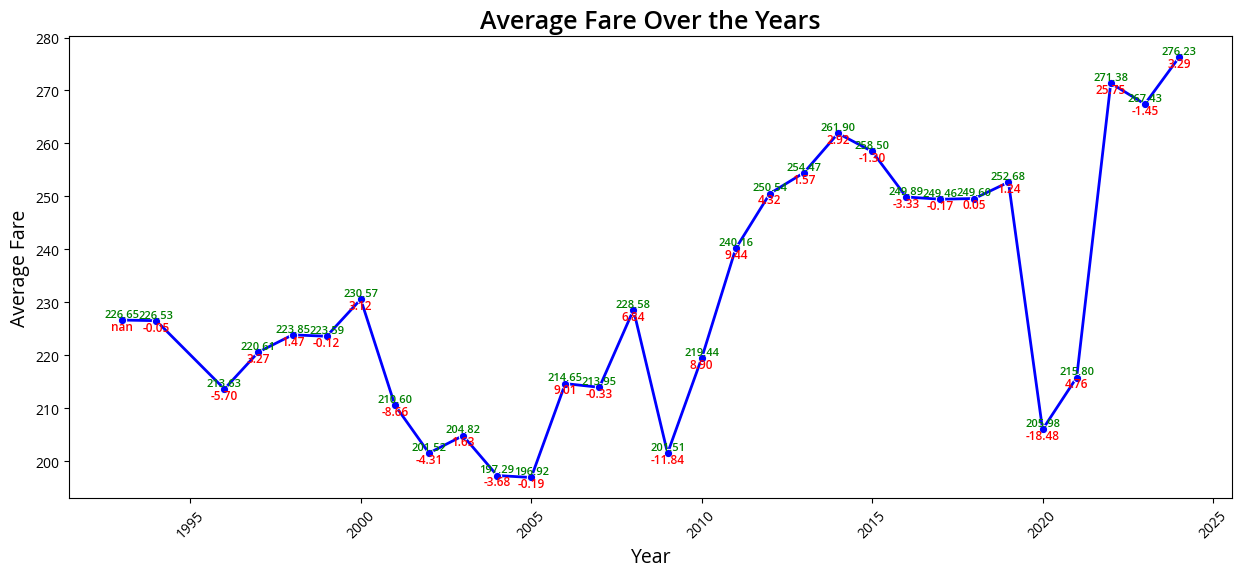

In [93]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='average_fare', data=fare_by_year, marker='o', color='blue',linewidth=2)
for i, row in fare_by_year.iterrows():
    plt.text(row['year'], row['average_fare'], f'{row["average_fare"]:.2f}', ha='center', va='bottom', fontsize=8, color='green', weight='bold')
    plt.text(row['year'], row['average_fare'], f'{row["percentage_increase"]:.2f}', ha='center', va='top', fontsize=8.5, color='red', weight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Average Fare Over the Years', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.grid()
plt.show()

It is evident that the most significant percentage decrease in fares occurred in 2020, which is likely because of COVID-19 pandemic affecting travel and causing disruption in airline industry. On the other hand, the biggest increase in fares was observed from 2021 to 2022, which might be due to a recovery in travel demand, inflation or other factors.

## Relationship between fare and passengers

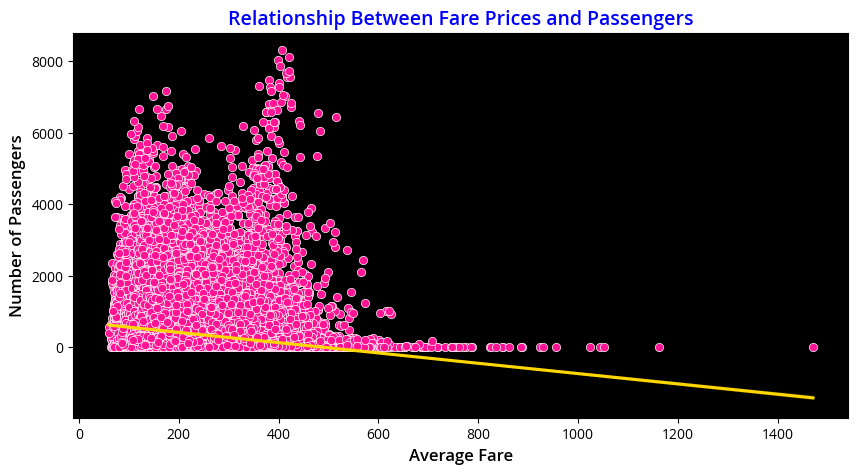

In [87]:
#Let's check if there is any relation between the number of passengers and the fare.

plt.figure(figsize=(10, 5))
sns.scatterplot(x='average_fare', y='passengers', data=data, color='deeppink')
sns.regplot(x='average_fare', y='passengers', data=data, scatter=False, color='gold')
plt.title('Relationship Between Fare Prices and Passengers', weight='bold', color='blue', fontsize=14)
plt.xlabel('Average Fare', fontsize=12, weight='bold')
plt.ylabel('Number of Passengers', fontsize=12, weight='bold')
plt.gca().set_facecolor('black')
plt.show()

This scatterplot indicates a slight negative correlation between fare prices and the number of passengers. As fare prices exceed 500, there is a minor decline in passenger numbers, though the overall relationship appears weak.

## Quarterly Passenger Trends Over Time 

Showing quarterly passenger trends over 5 year intervals using subplots to highlight variations and patterns across each period.

In [71]:
n_plots = 6 #No of subplots

# We are not including the data of year '2024' as it is incomplete.
year_ranges = [(1993, 1998), (1999, 2003), (2004, 2008), (2009, 2013), (2014, 2018), (2019, 2023)] 

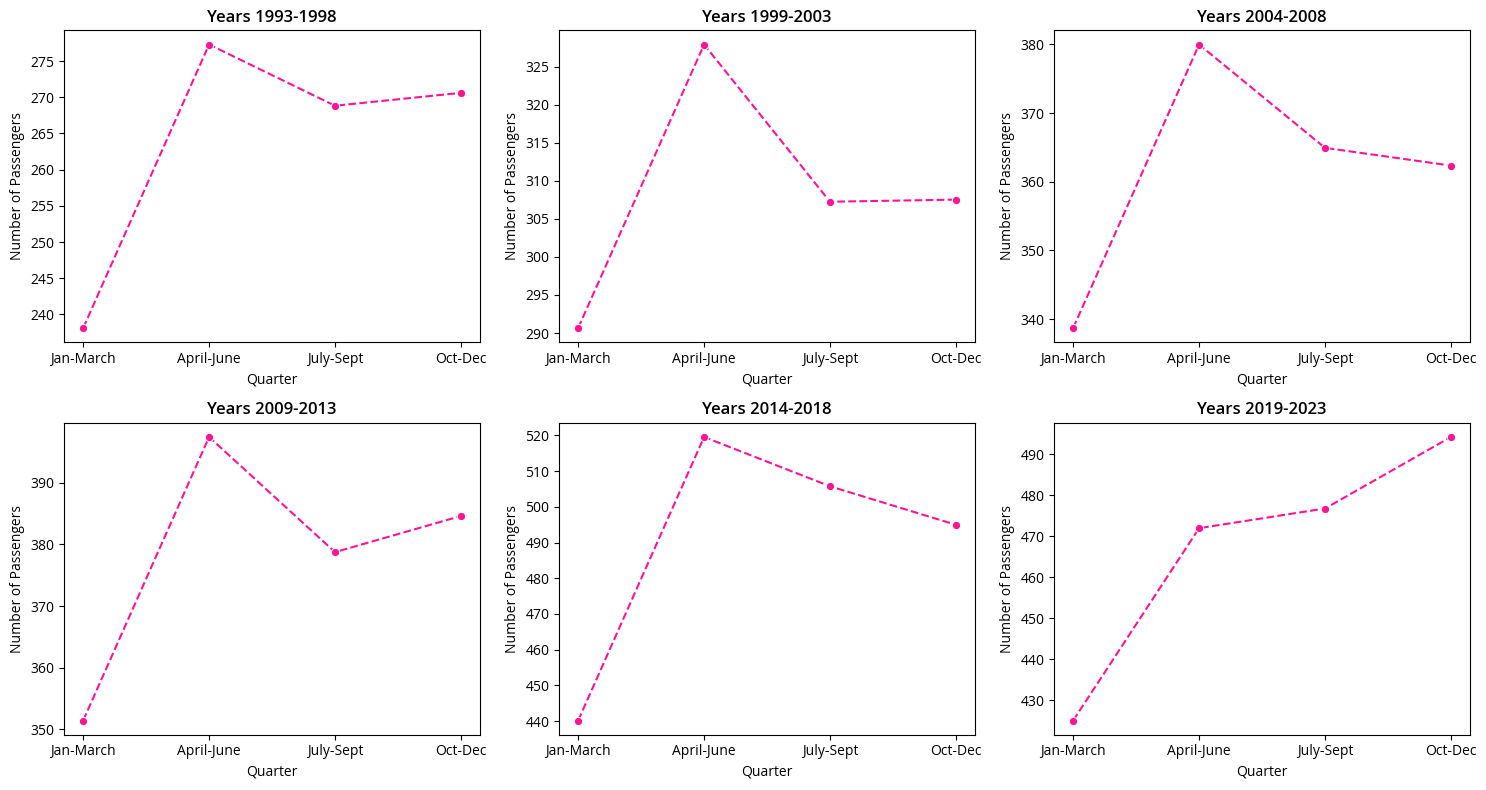

In [73]:
plt.figure(figsize=(15, 8))

quarter_order = ['Jan-March', 'April-June', 'July-Sept', 'Oct-Dec']

for i in range(1, n_plots + 1):
    plt.subplot(2, 3, i)
    
    start_year, end_year = year_ranges[(i-1) % len(year_ranges)]
    subset = data.loc[(data['year'] >= start_year) & (data['year'] <= end_year)]
    subset = subset.groupby('quarter')['passengers'].mean().reset_index()
    subset['quarter'] = pd.Categorical(subset['quarter'], categories=quarter_order, ordered=True)
    
    sns.lineplot(x='quarter', y='passengers', data=subset, marker='o', linestyle='--', color='deeppink')
    
    plt.title(f"Years {start_year}-{end_year}", weight='bold')
    plt.xlabel('Quarter')
    plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

From the above line plots, we can observe that the first quarter consistently has the lowest number of passengers in each period, while the second quarter typically has the highest number of passengers. However, in the period '2019-2023', the fourth quarter shows the highest passenger count. Also the passengers count always decreases in the third quarter except for the period '2019-2023'.

Let's investigate the reason behind the exceptional behavior observed during the period from 2019 to 2023.

In [75]:
# Filtering data for the period 2019 to 2023

period19_23 = data.loc[(data['year']>=2019) & (data['year']<=2023)].groupby(['year', 'quarter'])['passengers'].mean().reset_index()

In [77]:
period19_23

,year,quarter,passengers
0,2019,April-June,595.780353
1,2019,Jan-March,505.513304
2,2019,July-Sept,591.460283
3,2019,Oct-Dec,571.930435
4,2020,April-June,62.485955
5,2020,Jan-March,396.923810
6,2020,July-Sept,144.269962
7,2020,Oct-Dec,196.585082
8,2021,April-June,389.663605
9,2021,Jan-March,204.510328


From the table, we can see that the 'April-June' quarter of 2020 has a notably low average number of passengers. This decline is attributed to the COVID-19 pandemic, which significantly affected passenger numbers during this period.

## Comparison of market share over the years

Now we will see and compare how the market shares of both large carrier and low fare carrier have changed over the years.

In [79]:
# Grouping the data by year for calculating the mean of market shares for both type of carriers.

market_share_by_year = data.groupby('year')[['lowest_carrier_market_share', 'largest_carrier_market_share']].mean().reset_index()

In [81]:

market_share_by_year['largest_carrier_market_share'] = (market_share_by_year['largest_carrier_market_share'] * 100).round(1)
market_share_by_year['lowest_carrier_market_share'] = (market_share_by_year['lowest_carrier_market_share'] * 100).round(1)

print(market_share_by_year)

    year  lowest_carrier_market_share  largest_carrier_market_share
0   1993                         16.7                          58.4
1   1994                         17.1                          58.7
2   1996                         16.4                          57.4
3   1997                         16.7                          57.5
4   1998                         16.9                          59.0
5   1999                         17.2                          58.0
6   2000                         17.1                          57.5
7   2001                         17.1                          56.8
8   2002                         17.4                          57.1
9   2003                         17.5                          57.1
10  2004                         17.8                          57.2
11  2005                         17.4                          56.9
12  2006                         16.6                          58.2
13  2007                         16.6           

In [83]:
# Setting 'year' columns as index for the area chart

market_share_by_year.set_index('year', inplace=True)

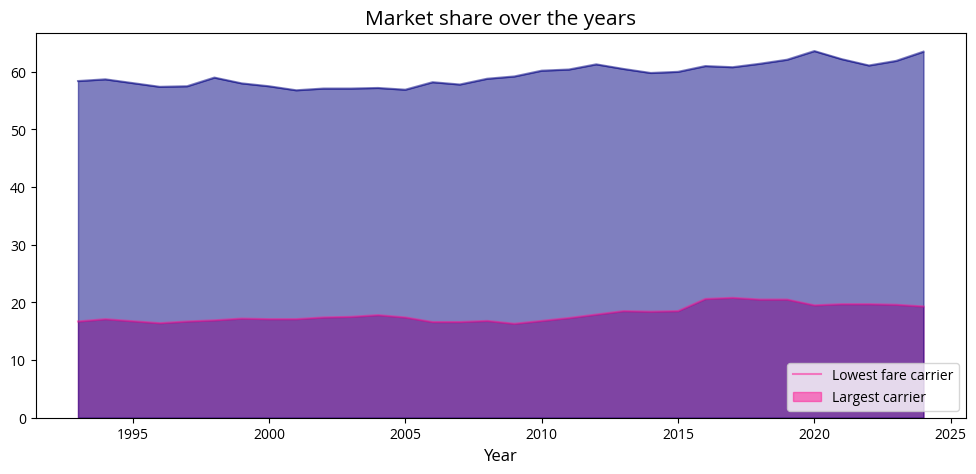

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))
market_share_by_year.plot.area(stacked=False, color=['deeppink', 'navy'], ax=ax)
ax.legend(loc='lower right', labels=['Lowest fare carrier', 'Largest carrier'])
plt.title('Market share over the years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.show()

The line chart indicates that the market share percentages of both carriers have remained relatively stable over the years. This means that neither carrier has gained or lost much market share, and the competition between them has been steady. The low fare carrier had its highest market share in 2017, while the largest carrier reached its peak market share in 2020.

## Fare Differences Across State Combinations and Top High-Fare Routes

Analyzing the fare difference between the largest carrier and the lowest fare carrier across various states.

In [87]:
# Extracting states from city columns

data[['origin_city', 'origin_state']] = data['origin_city'].str.split(',', expand=True)
data[['destination_city', 'destination_state']] = data['destination_city'].str.split(',', expand=True)

In [89]:
# We are keeping only the state names and removing any bracketed parts, such as 'metropolitan area'.

data['origin_state'] = data['origin_state'].str.split('(').str[0]
data['destination_state'] = data['destination_state'].str.split('(').str[0]

In [91]:
# Removing extra spaces for consistency.

data['origin_state'] = data['origin_state'].str.strip()
data['destination_state'] = data['destination_state'].str.strip()

In [93]:
# Determining the percentage difference between the average fares of large carriers and low-fare carriers.

data['fare_diff_pct'] = ((data['largest_carrier_average_fare']-data['lowest_carrier_average_fare'])/
                         (data['largest_carrier_average_fare']+data['lowest_carrier_average_fare']))*100

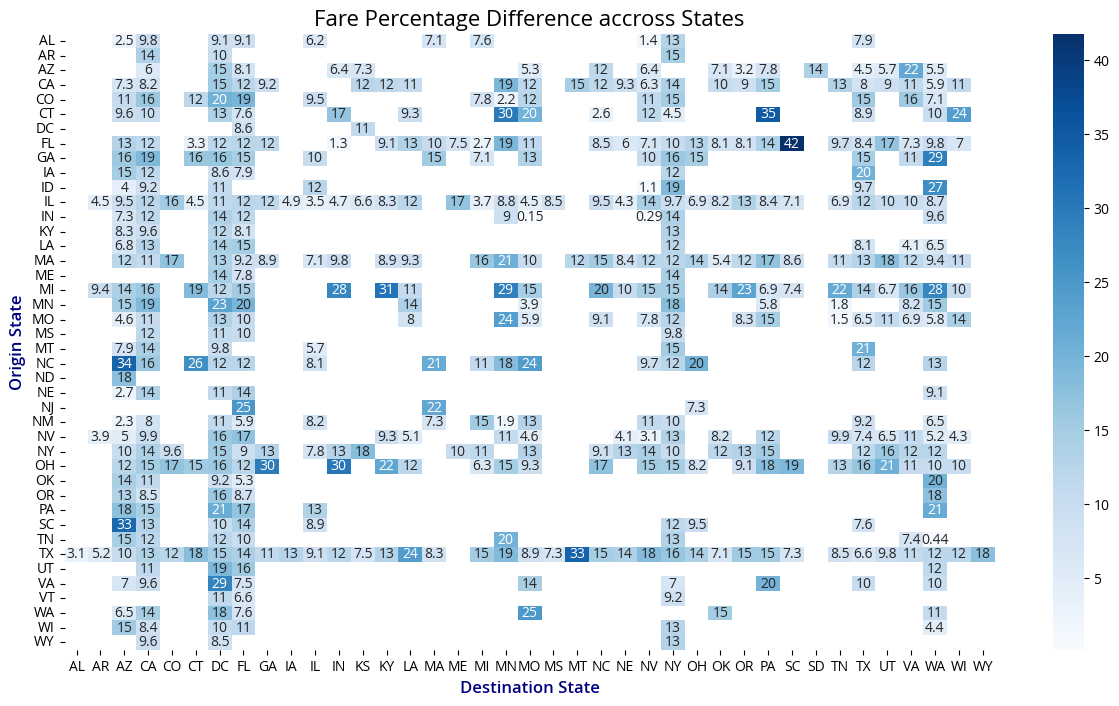

In [97]:
fare_diff_matrix = data.pivot_table(index='origin_state', columns='destination_state', values='fare_diff_pct', aggfunc='mean')

plt.figure(figsize=(15, 8))
sns.heatmap(fare_diff_matrix, cmap='Blues', annot=True)
plt.title('Fare Percentage Difference accross States', fontsize=16)
plt.xlabel('Destination State', fontsize=12, color='navy', weight='bold')
plt.ylabel('Origin State', fontsize=12, color='navy', weight='bold')
plt.show()

As we can see in the heatmap, the fare percentage difference between large carriers and low-fare carriers is displayed for each combination of origin and destination states. This visualization helps identify which state pairs experience the highest and lowest percentage differences in fares between large and low fare carriers.

We can observe that states such as Connecticut (CT), Texas (TX), and Florida (FL) exhibit significant fare percentage differences between large and low-fare carriers.

We will examine the top routes with the highest average fares

In [99]:
# Creating a route column by combining origin and destination city

data['route'] = data['origin_city'] + " - " + data['destination_city']

In [101]:
# Calculating average fare of these routes.

average_fare_by_route = data.groupby('route')['average_fare'].mean().sort_values(ascending=False).reset_index()

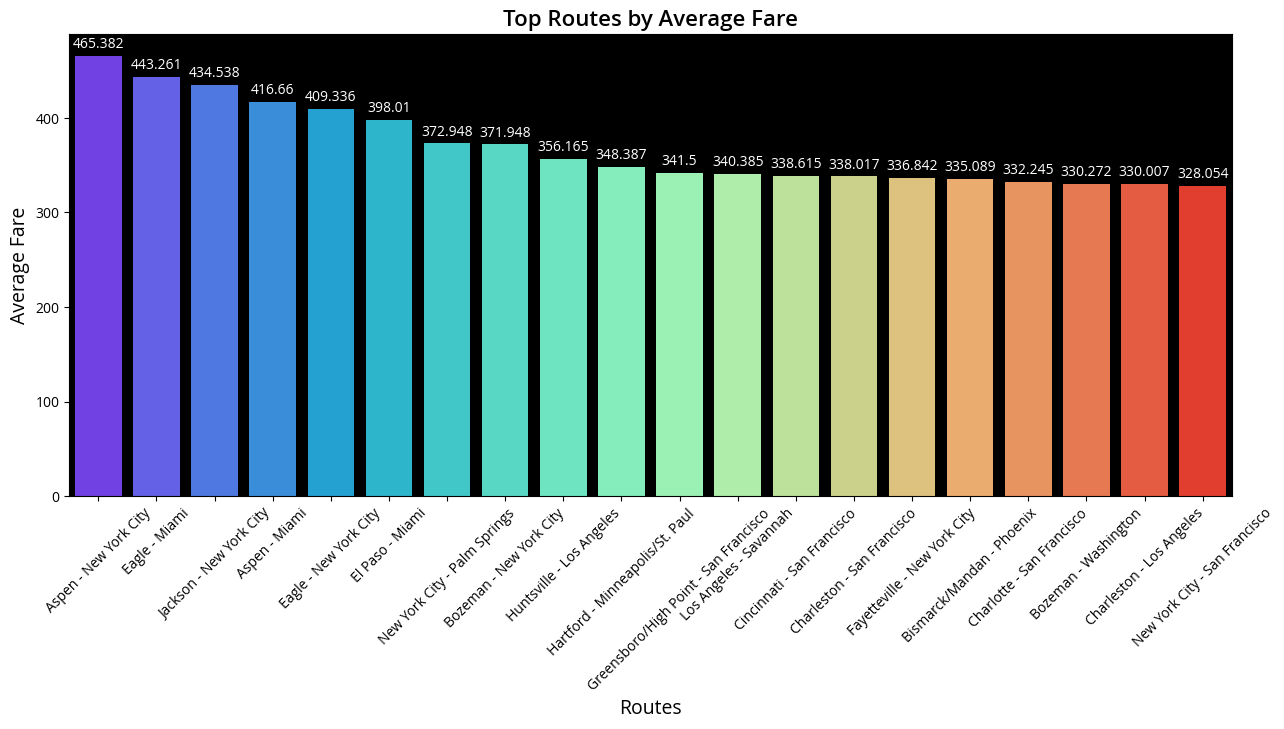

In [103]:
# Finding and plotting top 20 routes by average fare

top_20_routes = average_fare_by_route.head(20)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='route', y='average_fare', data=top_20_routes, hue='route', palette='rainbow')
for i in ax.containers:
    ax.bar_label(i, padding=3, color='white')
plt.title('Top Routes by Average Fare', weight='bold', fontsize=16)
plt.xlabel('Routes', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(rotation=45)
plt.gca().set_facecolor('black')
plt.show()

## Analyzing Fare Patterns of Top Carriers Throughout the Years

We will identify the top 5 carriers based on their total revenue and analyze how their average fare has evolved over the years.

In [105]:
# Creating a column for the number of passengers of largest carriers. 
data['largest_carriers_passengers'] = (data['passengers'] * data['largest_carrier_market_share']).round(0)

# Creating a column for calculating the revenue of largest carriers.
data['revenue'] = data['largest_carriers_passengers'] * data['largest_carrier_average_fare']

In [107]:
# Identifying top 5 carriers by total revenue.

top_large_carriers = data.groupby('largest_carrier_code')['revenue'].sum().sort_values(ascending=False).reset_index().head(5)
top_large_carriers

,largest_carrier_code,revenue
0,UA,1.415027e+09
1,AA,1.360426e+09
2,DL,1.089871e+09
3,WN,7.338906e+08
4,CO,4.489539e+08


In [109]:
# Filtering the data 
largest_carriers = data.loc[data['largest_carrier_code'].isin(top_large_carriers['largest_carrier_code'])]

largest_carriers = largest_carriers.groupby(['year', 'largest_carrier_code'])['largest_carrier_average_fare'].mean().reset_index()

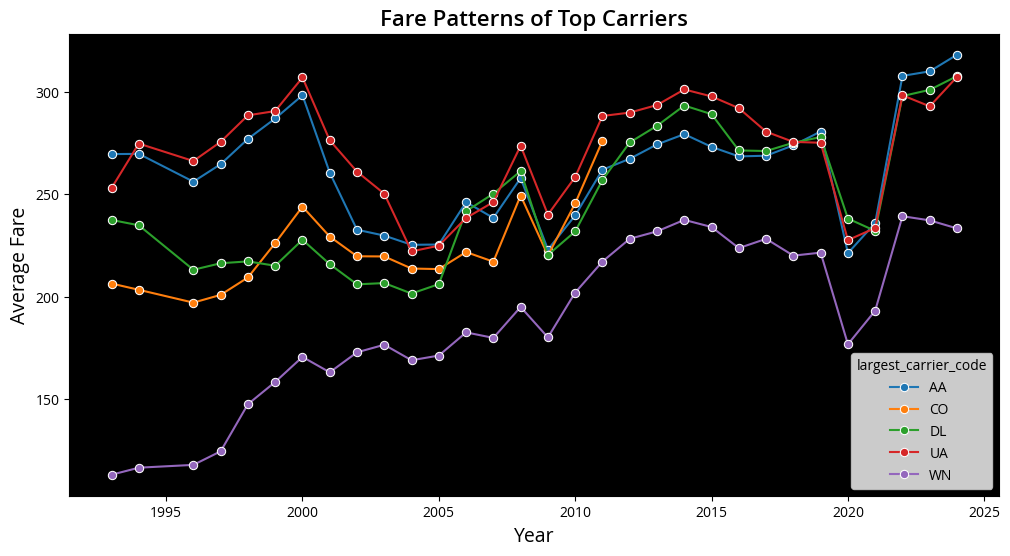

In [111]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='largest_carrier_average_fare', data=largest_carriers, hue='largest_carrier_code', linestyle='-', marker='o')
plt.title('Fare Patterns of Top Carriers', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.gca().set_facecolor('black')
plt.savefig('png.png')

All airlines had a sharp peak in fare prices till 2000, followed by a decline. 
The fare trends post 2010 are relatively more stable compared to the unstable observed in the earlier years.
The COVID-19 period seems to have caused a sharp dip for all airlines then they shows a rapid recovery afterward. This could be tied to travel restrictions and a rebound in demand once restrictions lifted.

## Airports with the Highest Passenger Flow

We will identify the airports with the highest average number of passengers.

In [113]:
# Grouping data by airports and changing the column name to 'airport' for concatenating.

origin_airport_passengers = data.groupby('origin_airport')['passengers'].mean().reset_index()
origin_airport_passengers.rename(columns={'origin_airport': 'airport'}, inplace=True)

destination_airport_passengers = data.groupby('destination_airport')['passengers'].mean().reset_index()
destination_airport_passengers.rename(columns={'destination_airport': 'airport'}, inplace=True)

In [115]:
# Concatenating both data frames and finding top 15 airports by passenger volume.

top_airports = pd.concat([origin_airport_passengers, destination_airport_passengers], ignore_index=True)
busiest_airports = top_airports.groupby('airport')['passengers'].mean().round(0).sort_values(ascending=False).reset_index().head(15)

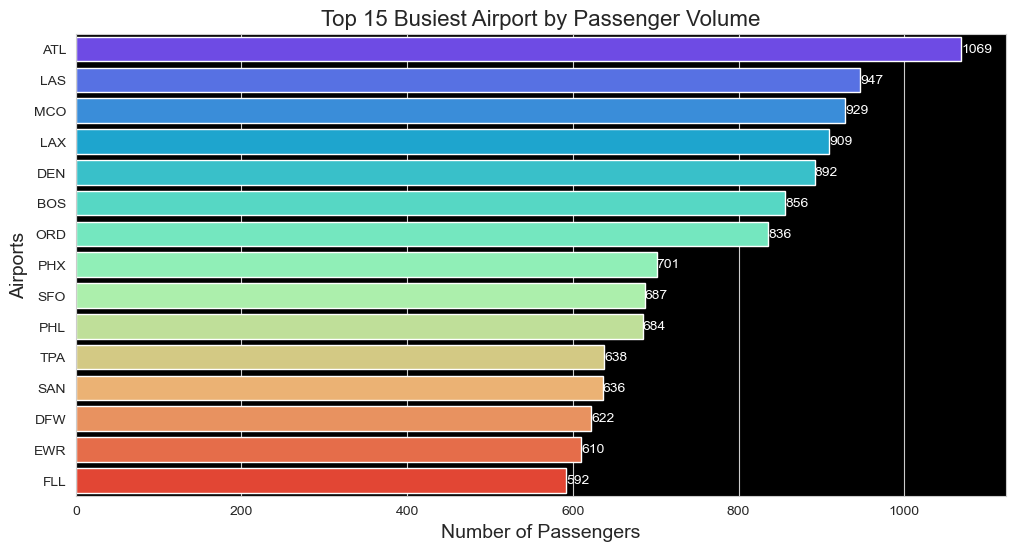

In [117]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x='passengers', y='airport', data=busiest_airports, palette='rainbow')
plt.title('Top 15 Busiest Airport by Passenger Volume', fontsize=16)
for i in ax.containers:
    ax.bar_label(i, color='white')
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Airports', fontsize=14)
plt.gca().set_facecolor('black')
plt.show()

Atlanta (ATL) stands out as the busiest airport.

By identifying the busiest airports, airlines and airport authorities can better allocate resources like staff, gates, and flights. This helps manage passenger traffic efficiently and reduces delays at peak airports.

## Geographic Distribution of Airline Routes

Now we will visualize the number of airline routes for each city across the United States. Each city is represented by a point on the map, with the size of the point corresponding to the number of routes originating from that city.

In [131]:
# Finding the unique number of routes for each origin city

routes_by_city = data.groupby('origin_city')['route'].nunique().reset_index()

In [137]:
from geopy.geocoders import Photon
geolocator = Photon(user_agent="measurements")

In [139]:
def get_location(city):
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

In [ ]:
routes_by_city[['latitude', 'longitude']] = routes_by_city['origin_city'].apply(lambda x: pd.Series(get_location(x)))

In [199]:
routes_by_city.to_csv('location.csv', index=False)

In [205]:
import plotly.express as px

In [209]:
fig = px.scatter_geo(routes_by_city,
                     lat='latitude',
                     lon='longitude',
                     text='origin_city',  # City names on hover
                     size='routes',  # Bubble size based on the number of routes
                     title="Number of Routes per City",
                     scope='north america',  # Limiting map to North America
                     projection="natural earth")

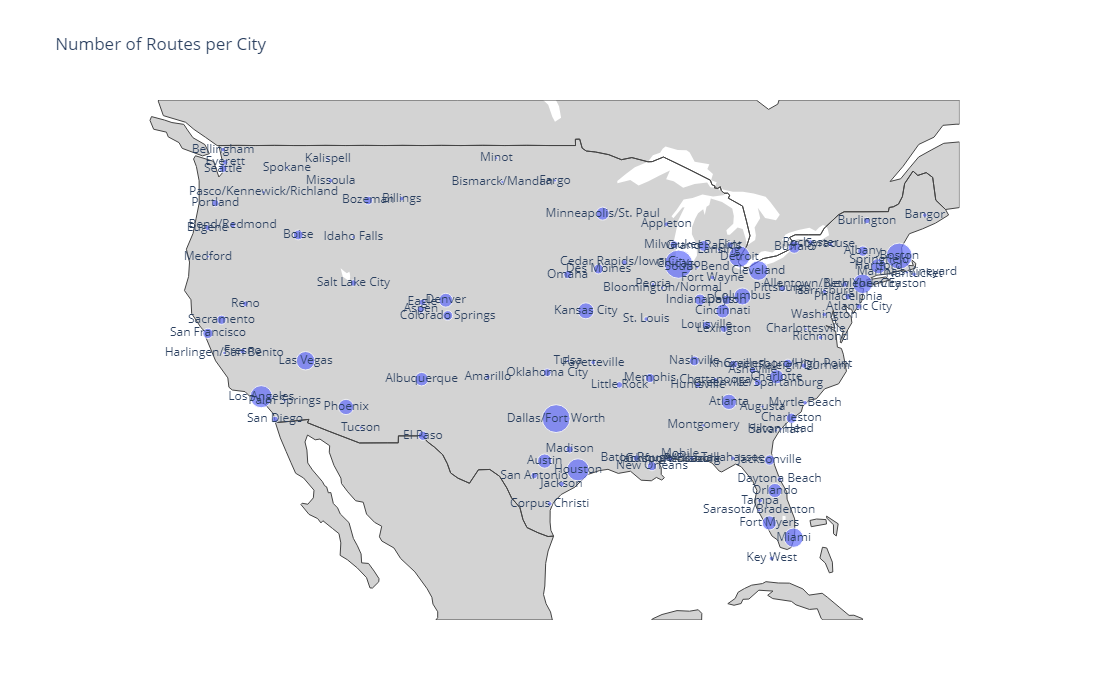

In [217]:
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgray"
    ),
    height=700,
    width=1000
)
fig.show()

We can observe that larger cities such as Boston, Dallas, and Chicago stand out with a higher number of routes, reinforcing their status as major transportation hubs. Understanding this distribution allows airlines to refine their route planning, adjust capacity, and explore partnerships to strengthen their network presence.